In [1]:
import pandas as pd ## Pandas Library (will use to load data,create data frame...etc).
import numpy as np ## Numpy Library ( will use to convert data frame to array or creating array etc...).
import os ## For connecting to machine to get path for reading/writing files.
import matplotlib.image as mpimg ## To load image.
import matplotlib.pyplot as plt ## For Visualizaton.
from keras.preprocessing import image ## To load Image and convert it into array.
from tqdm import tqdm ## To print Progress bars.
from sklearn.model_selection import train_test_split ## To split train data into train and validation data.
from keras.utils import to_categorical ## One hot Encoding.
from keras.models import Sequential ## Sequential Model.
from keras.layers import Dense ## Fully connected layer(all inputs connected to all nodes).
from keras.layers import Dropout ## For Regularaization (drops couple of nodes based on integer passed to constructor).
from keras.layers import Flatten ## To convert array  into 1D(one dimesional).
from keras.layers import Conv2D ## Convolution two dimensional layer .
from keras.layers import MaxPool2D ## fecthing important features/ reducing dimensions.
from keras.optimizers import RMSprop # Optimizer.
from keras.preprocessing.image import ImageDataGenerator # Image Augmentation.
from keras.callbacks import ReduceLROnPlateau # Call backs/Early stopping.

Using TensorFlow backend.


In [2]:
## Set max how many rows and columns you want to display in jupyter notebook.
pd.options.display.max_columns = 200 
pd.get_option('display.max_rows') 
pd.set_option('display.max_rows',None)

In [4]:
## Images path.
image_path ='train/images/'

In [5]:
train = pd.read_csv('train/train.csv',header='infer',sep=',')
test = pd.read_csv('test.csv',header='infer',sep=',')

In [6]:
## Print dimensions of train and test data.
print(train.shape)
print(test.shape)

(1646, 2)
(706, 1)


In [7]:
## Check first record from train data.
train.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [8]:
## Check last record from train data.
train.tail(1)

,image_names,emergency_or_not
1645,860.jpg,1


In [11]:
## Check first record from test data.
test.head(1)


,image_names
0,1960.jpg


In [12]:
test.tail(1)

,image_names
705,1014.jpg


In [13]:
## Get summary statistics of train data.
train.describe(include='all')

,image_names,emergency_or_not
count,1646,1646.000000
unique,1646,NaN
top,1439.jpg,NaN
freq,1,NaN
mean,NaN,0.413730
std,NaN,0.492651
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [14]:
## Get summary statistics of test data.
test.describe(include='all')

,image_names
count,706
unique,706
top,2206.jpg
freq,1


In [15]:
## Method will read list of images in the given path and returns image list.
def get_images_list(path):
    image_list = [] ## Initialize empty list.
    for img in tqdm(os.listdir(path)): ## Get list of image names from the given path and process each image names.
        image_list.append(img) ## add image name to image list.
    return image_list

In [16]:
## Get image list for the the given path.
image_list = get_images_list(image_path)

100%|██████████| 2354/2354 [00:00<00:00, 1895084.76it/s]


In [17]:
## Print first image name from image_list.
image_list[0]

'63.jpg'

In [18]:
## Plot sample images based on given image location.
def display_sample_images(path):
    plt.figure(figsize=(20,6)) ## Set Figure Size.
    for ind,image_name in tqdm(enumerate(os.listdir(path))): ## enumerate() function iterates list and return index,value.
        img = mpimg.imread(os.path.join(path,image_name)) ## imread() reads the image from the given path and image name.
        if ind<10: ## Based on this condition it prints only 10 images.
            plt.subplot(2,5,ind+1) ## Add a subplot to the current figure(2 rows,5 columns and current index).
            plt.imshow(img) ## Displays image.
            plt.axis('off') ## Axis values will off.
            plt.title(ind) ## Setting title name to image.

355it [00:00, 390.22it/s]


OSError: cannot identify image file 'train/images/.DS_Store'

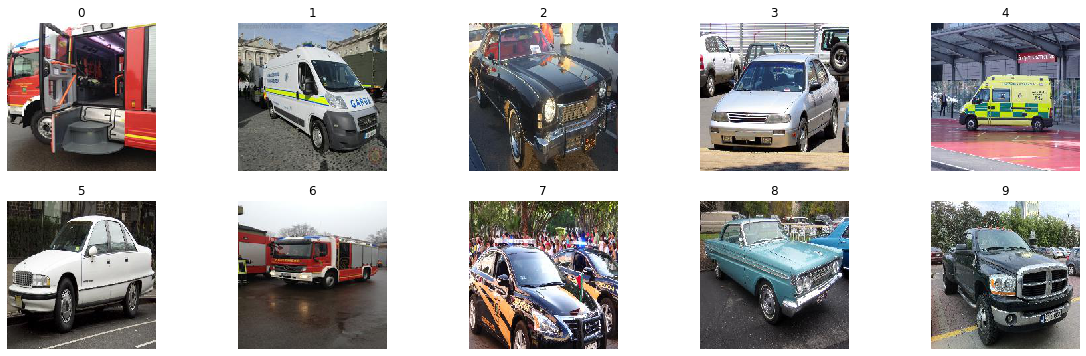

In [19]:
## Display first 10 images.
display_sample_images(image_path)

In [20]:
## Image Size
IMG_SIZE = 28

In [21]:
## Load training images from the given path based on image names which are there in train data and convert them into array.
def load_train_data(img_path):
    train_data = [] ## Initialize empty list
    for img in tqdm(train['image_names']): ## Get list of image names from train data and process each image name.
        if img in image_list: ## If the image name is present in image list then only we have to read image.
            path = os.path.join(img_path, img) ## Location of the the image.
            img = image.load_img(path,                              ## Load image from the given path and
                                 target_size=(IMG_SIZE,IMG_SIZE,3), ## Keep image size as 28X28X3(height,width,color channels) and
                                 grayscale=False)                   ## grayscale is false indicates that image is color image.
            img = image.img_to_array(img) ## Convert image pixels into an array.
            img = img/255 ## Normalize the train data (CNN converg faster on [0..1] data than on [0..255]).
            train_data.append(img) ## Add normalized image pixel array to train data.      
    return np.array(train_data) ## Convert list into an array and returns it.

In [22]:
## Get training data for the given image path.
train_data = load_train_data(image_path)

100%|██████████| 1646/1646 [00:02<00:00, 636.01it/s]


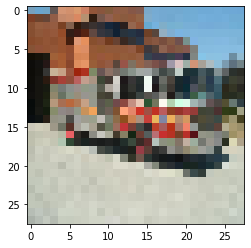

In [23]:
## Display sample train image.
plt.imshow(train_data[1491], cmap = 'gist_gray')

In [24]:
## Get size of the train_data.
len(train_data)

1646

In [25]:
## Check image size.
len(image_list)

2354

In [26]:
## Load testing images from the given path based on images names which are there in test data and convert them into array.
def load_test_data(image_path):
    test_data = []  ## Initialize empty list
    for img in tqdm(test['image_names']): ## Get list of image names from test data and process each image name.
        if img in image_list: ## If the image name is present in image list then only we have to read image.
            path = os.path.join(image_path, img) ## Location of the the image.
            img = image.load_img(path,                              ## Load image from the given path and
                                 target_size=(IMG_SIZE,IMG_SIZE,3), ## Keep image size as 28X28X3(height,width,color channels) and
                                 grayscale=False)                   ## grayscale is false indicates that image is color image.
            img = image.img_to_array(img) ## Convert image pixels into an array.
            img = img/255 ## Normalize the test data (CNN converg faster on [0..1] data than on [0..255]).
            test_data.append(img) ## Add normalized image pixel array to test data.
    return np.array(test_data) ## Convert list into an array and returns it.

In [27]:
## Get testing data for the given image path.
test_data = load_test_data(image_path)

100%|██████████| 706/706 [00:01<00:00, 615.15it/s]


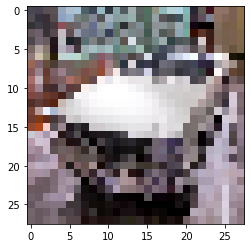

In [28]:
## Display sample test image.
plt.imshow(test_data[0], cmap = 'gist_gray')

In [29]:
## Do one hot encoding on target/label varible.
y = train['emergency_or_not'].values ## Fetch label/target values(0/1).
y = to_categorical(y) ## Converts a class vector (integers) to binary class matrix.

In [30]:
## Check sample value of target after doing one hot encoding.
y[0]

array([1., 0.], dtype=float32)

In [31]:
## Check sample record of target after doing one hot encoding.
y[5]

array([0., 1.], dtype=float32)

In [32]:
## Split the train data into train and validation data.
X_train, X_test, y_train, y_test = train_test_split(train_data,       ## Features(i/p).
                                                    y,                ## Traget(0/p).
                                                    random_state=474, ## It is the seed used by the random number generator.
                                                    test_size=0.2)    ## % of train and validation division.(80:20)

In [34]:
# Define the model structure.

## Instantiate Sequential model.
model = Sequential()

# Convolution layer with feature map size 3X3,32 filters,input shape 28X28X3,Relu Activation function.
model.add(Conv2D(32,  ##  Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
                 kernel_size=(3, 3), ## An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.Can be a single integer to specify the same value for all spatial dimensions(Feature Map).
                 padding = 'Same', ## one of "valid" or "same" (padding is added to the frame of the image to allow for more space for the kernel to cover the image).
                 activation='relu', ## Activation function.If you don't specify anything, no activation is applied.
                 input_shape=(28,28,3))) ## Input shapes(28X28X3).

## Convolution layer with feature map size 3X3,64 filters,Relu Activation function.
model.add(Conv2D(64,
                 kernel_size=(3, 3), 
                 padding = 'Same',
                 activation='relu'))

## Maxpooling layer with kernal size 2X2,default stride (pool_size).
model.add(MaxPool2D(pool_size=(2, 2)))

## Droput 25% Nodes.
model.add(Dropout(0.25))

## Convert array data into one dimensional data.
model.add(Flatten())

## Fully connected layer with 128 output shape,Relu Activation function.
model.add(Dense(128, activation='relu'))

## Dropouts 50% Nodes.
model.add(Dropout(0.5))

## Fully connnected layer with 2 output shape,Softmax activation function.
model.add(Dense(2, activation='softmax'))

In [35]:
# Compile the model.
model.compile(loss='categorical_crossentropy',  ## String (name of objective function) or objective function or`Loss` instance.
              optimizer='Adam',                 ## String (name of optimizer) or optimizer instance.
              metrics=['accuracy'])             ## List of metrics to be evaluated by the model during training and testing.

In [36]:
# Fit the model.
model.fit(X_train,                            ## Input/Training data.
          y_train,                            ## Labels/Targe/Output data.
          epochs=30,                          ## Number of epochs to train the model.
          validation_data=(X_test, y_test))   ## On which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data(Validation  data). 


Train on 1316 samples, validate on 330 samples
Epoch 1/30
1316/1316 [==============================] - 4s 3ms/step - loss: 0.6734 - accuracy: 0.6011 - val_loss: 0.5878 - val_accuracy: 0.7000
Epoch 2/30
1316/1316 [==============================] - 3s 2ms/step - loss: 0.5468 - accuracy: 0.7325 - val_loss: 0.5933 - val_accuracy: 0.7242
Epoch 3/30
1316/1316 [==============================] - 3s 2ms/step - loss: 0.4831 - accuracy: 0.7774 - val_loss: 0.5384 - val_accuracy: 0.7212
Epoch 4/30
1316/1316 [==============================] - 3s 2ms/step - loss: 0.4349 - accuracy: 0.7948 - val_loss: 0.5775 - val_accuracy: 0.7152
Epoch 5/30
1316/1316 [==============================] - 3s 2ms/step - loss: 0.4046 - accuracy: 0.8161 - val_loss: 0.5138 - val_accuracy: 0.7394
Epoch 6/30
1316/1316 [==============================] - 3s 2ms/step - loss: 0.3511 - accuracy: 0.8435 - val_loss: 0.5326 - val_accuracy: 0.7667
Epoch 7/30
1316/1316 [==============================] - 3s 2ms/step - loss: 0.2976 - acc

In [37]:
## Get predictions for test data
prediction = model.predict_classes(test_data)

In [38]:
## Print first value from predictions
prediction[0]

0

In [39]:
## Copy test data into temp
temp = test.copy()

In [40]:
## Add predictions data to temp data frame with 'emergency_or_not' column name
temp ['emergency_or_not'] = prediction

In [41]:
## Check first 5 records from temp data
temp.head()

,image_names,emergency_or_not
0,1960.jpg,0
1,668.jpg,1
2,2082.jpg,0
3,808.jpg,1
4,1907.jpg,0


In [42]:
## Copy 'image_names', 'emergency_or_not' columns data from temp to to_submit
to_submit = temp[['image_names', 'emergency_or_not']]

In [43]:
## Check the data value count for 'emergency_or_not' column
to_submit.emergency_or_not.value_counts()

0    425
1    281
Name: emergency_or_not, dtype: int64

In [44]:
## Store to_submit data into a csv file with name Keras_Predictions 
to_submit.to_csv('Keras_Predictions.csv',index = False)

In [46]:
## Set the CNN model.
## My CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out .

## Instantiate Sequential model.
model = Sequential()

## Convolution layer with feature map size 5X5,32 filters,input shape 28X28X1,Relu Activation function.
model.add(Conv2D(filters = 32, ## Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
                 kernel_size = (5,5), ## An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.Can be a single integer to specify the same value for 1all spatial dimensions.
                 padding = 'Same', ## one of `"valid"` or `"same"`.
                 activation ='relu',## Activation function.If you don't specify anything, no activation is applied.
                 input_shape = (28,28,3))) ## input shapes(28X28X3).

## Convolution layer with feature map size 5X5,32 filters,Relu Activation function.
model.add(Conv2D(filters = 32,
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu'))

## Maxpooling layer with kernal size 2X2,default stride (pool_size).
model.add(MaxPool2D(pool_size=(2,2)))

## Droput 25% Nodes.
model.add(Dropout(0.25))

## Convolution layer with feature map size 3X3,64 filters,Relu Activation function.
model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 padding = 'Same', 
                 activation ='relu'))

## Convolution layer with feature map size 3X3,64 filters,Relu Activation function.
model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 padding = 'Same', 
                 activation ='relu'))

## Maxpooling layer with kernal size 2X2,Stride 2X2.
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

## Droput 25% Nodes.
model.add(Dropout(0.25))

## Convert array data into one dimensional data.
model.add(Flatten())

## Fully connected layer with 256 output shape,Relu Activation function.
model.add(Dense(256, activation = "relu"))

## Dropouts 50% Nodes.
model.add(Dropout(0.5))

## Fully connnected layer with 2 output shape,Softmax activation function.
model.add(Dense(2, activation = "softmax"))

In [47]:
## Define the RMSprop optimizer with leaning rate 0.001.
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [48]:
## Compile the model
model.compile(optimizer = optimizer ,            ## String (name of optimizer) or optimizer instance.
              loss = "categorical_crossentropy", ## String (name of objective function) or objective function or`Loss` instance. 
              metrics=["accuracy"])              ## List of metrics to be evaluated by the model during training and testing.

In [49]:
## Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', ## Quantity to be monitored.
                                            patience=3,     ## Number of epochs that produced the monitored quantity with no improvement after which training will be stopped. 
                                            verbose=1,      ## int. 0: quiet, 1: update messages.
                                            factor=0.5,     ## Factor by which the learning rate will be reduced. new_lr = lr * factor
                                            min_lr=0.00001) ## Lower bound on the learning rate.

In [50]:
## Instantiate Data Augmentation

datagen = ImageDataGenerator(featurewise_center=False,            ## Set input mean to 0 over the dataset
                             samplewise_center=False,             ## Set each sample mean to 0
                             featurewise_std_normalization=False, ## Divide inputs by std of the dataset
                             samplewise_std_normalization=False,  ## Divide each input by its std
                             zca_whitening=False,                 ## Apply ZCA whitening
                             rotation_range=10,                   ## Randomly rotate images in the range (degrees, 0 to 180)
                             zoom_range = 0.1,                    ## Randomly zoom image 
                             width_shift_range=0.1,               ## Randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1,              ## Randomly shift images vertically (fraction of total height)
                             horizontal_flip=False,               ## Randomly flip images horizontally
                             vertical_flip=False)                 ## Randomly flip images vertically

## Fit data augmentation model
datagen.fit(X_train)

In [51]:
epochs = 30      ## Number of epochs to train a model
batch_size = 86  ## Number of sample to process at a time

In [52]:
## Fit the model
history = model.fit_generator(datagen.flow(X_train,                           ## Input data
                                           y_train,                           ## Labels/ Target/ out put data
                                           batch_size=batch_size),            ## Batch size (default: 32)
                              epochs = epochs,                                ## Number of epochs to train the model.
                              validation_data = (X_test, y_test),             ## On which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data(Validation data).
                              verbose = 2,                                    ## 0, 1, or 2. Verbosity mode 0 = silent, 1 = progress bar, 2 = one line per epoch.
                              steps_per_epoch=X_train.shape[0] // batch_size, ## Total number of steps (batches of samples) to yield from `generator` before declaring one epoch finished and starting the next epoch. It should typically be equal to `ceil(num_samples / batch_size)`
                              callbacks=[learning_rate_reduction])            ## List of callbacks to apply during training.

Epoch 1/30
 - 4s - loss: 0.7432 - accuracy: 0.5504 - val_loss: 0.6724 - val_accuracy: 0.5939
Epoch 2/30
 - 3s - loss: 0.6797 - accuracy: 0.5902 - val_loss: 0.6738 - val_accuracy: 0.5939
Epoch 3/30
 - 3s - loss: 0.6712 - accuracy: 0.6101 - val_loss: 0.6504 - val_accuracy: 0.6667
Epoch 4/30
 - 3s - loss: 0.7879 - accuracy: 0.6293 - val_loss: 0.6267 - val_accuracy: 0.6576
Epoch 5/30
 - 3s - loss: 0.6177 - accuracy: 0.6726 - val_loss: 0.6015 - val_accuracy: 0.6909
Epoch 6/30
 - 3s - loss: 0.5827 - accuracy: 0.7093 - val_loss: 0.6191 - val_accuracy: 0.6667
Epoch 7/30
 - 3s - loss: 0.6121 - accuracy: 0.6715 - val_loss: 0.5741 - val_accuracy: 0.6788
Epoch 8/30
 - 3s - loss: 0.5794 - accuracy: 0.7111 - val_loss: 0.5717 - val_accuracy: 0.7152
Epoch 9/30
 - 3s - loss: 0.5577 - accuracy: 0.7310 - val_loss: 0.5558 - val_accuracy: 0.7394
Epoch 10/30
 - 3s - loss: 0.5943 - accuracy: 0.6943 - val_loss: 0.5712 - val_accuracy: 0.6939
Epoch 11/30
 - 3s - loss: 0.5278 - accuracy: 0.7569 - val_loss: 0.559

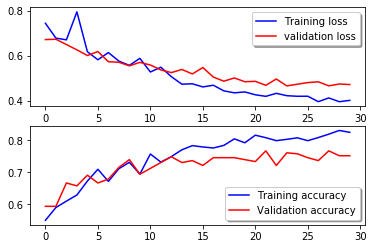

In [53]:
## Plot the loss and accuracy curves for training and validation data
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [54]:
## Get Predictions for test data
results = model.predict(test_data)

In [55]:
## Select the indix with the maximum probability
results = np.argmax(results,axis = 1)

In [56]:
## Copy test data into temp
temp = test.copy()

In [57]:
## Add predictions data to temp data frame with 'emergency_or_not' column name
temp ['emergency_or_not'] = results

In [58]:
## Copy 'image_names', 'emergency_or_not' columns data from temp to to_submit
to_submit = temp[['image_names', 'emergency_or_not']]

In [60]:
## Check the data value count for 'emergency_or_not' column
to_submit.emergency_or_not.value_counts()

0    394
1    312
Name: emergency_or_not, dtype: int64

In [61]:
## Store to_submit data into a csv file with name Keras_Predictions_With_DataAugmentation 
to_submit.to_csv('Keras_Predictions_With_DataAugmentation.csv',index = False)